In [2]:
import pickle
X_file = "/Users/aparnabg/Desktop/x_data.pickle"
Y_file = "/Users/aparnabg/Desktop/y_data.pickle"

with open(X_file, 'rb') as file:
    X = pickle.load(file)
with open(Y_file, 'rb') as file:
    Y = pickle.load(file)

In [3]:

from keras.utils import to_categorical
import numpy as np
Y = np.argmax(Y, axis=1)
Y = to_categorical(Y, num_classes=9)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
scaler.fit(np.append(X[:,:,0], X[:,:,1], axis=0))

X_real = scaler.transform(X[:,:,0])
X_imag = scaler.transform(X[:,:,1])

In [5]:
X = np.stack((X_real, X_imag), axis=-1)

In [6]:
from sklearn.model_selection import train_test_split
input_train, input_test, target_train , target_test =  train_test_split(X, Y, test_size=0.2, random_state=40)

In [7]:
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

# Model configuration
batch_size = 250
no_epochs = 5
no_classes = 9
validation_split = 0.2
verbosity = 1


# Shape of the input sets
input_train_shape = input_train.shape
input_test_shape = input_test.shape
print(input_train_shape,input_test_shape )

(1945762, 90, 2) (486441, 90, 2)


In [8]:

# Keras layer input shape
input_shape = (input_train_shape[1], input_train_shape[2], 1)
# Reshape the training data to include channels
input_train = input_train.reshape(input_train_shape[0], input_train_shape[1], input_train_shape[2], 1)
input_test = input_test.reshape(input_test_shape[0], input_test_shape[1], input_test_shape[2], 1)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
# Normalize input data
input_train = input_train / 127
input_test = input_test / 127






In [9]:
#Building a Model Without Batch Normalization
model = Sequential()
# Convolutional layers
model.add(Conv2D(32, (2, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(64, (2, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))



2024-02-05 19:08:27.202364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-05 19:08:27.203036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
from tensorflow.keras.layers import LSTM
model = Sequential()
from tensorflow.keras.layers import  TimeDistributed, Flatten
# Convolutional layers
model.add(Conv2D(32, (2, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(64, (2, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))
model.add(TimeDistributed(Flatten()))
#LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [13]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

In [14]:
target_train.shape, input_train.shape, no_classes

((1945762, 9), (1945762, 90, 2, 1), 9)

In [1]:
from tensorflow.keras.models import load_model
checkpoint_path_model = "/Users/aparnabg/Desktop/mygpucnnlstm"
model= loaded_model = load_model(checkpoint_path_model)

/Users/aparnabg/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-02-05 22:00:24.871026: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-05 22:00:24.871069: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-05 22:00:24.871079: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-05 22:00:24.871158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-05 22:00:24.871429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0,

In [ ]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=5,
            verbose=verbosity,
            validation_split=validation_split)

In [13]:

model.save('mygpucnnlstm.keras')

In [14]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 393.2432861328125 / Test accuracy: 0.18555179238319397


Test loss: 0.6370455026626587 / Test accuracy: 0.7536802887916565


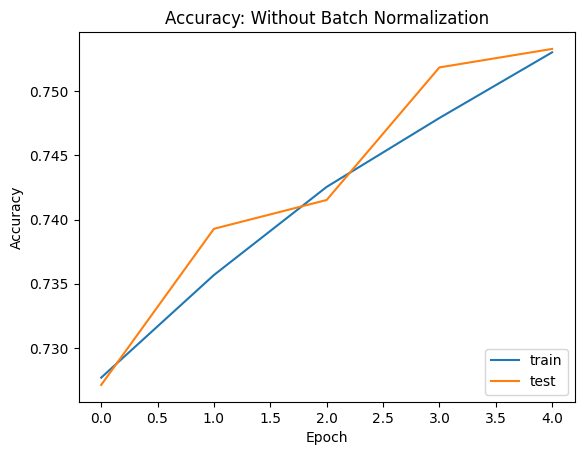

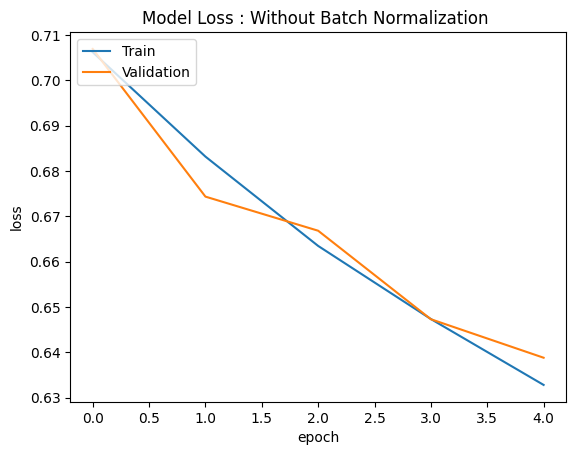

In [22]:


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.title("Accuracy: Without Batch Normalization")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss : Without Batch Normalization ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()